Remember;
Change all fonts to serif - check
Change eye sight and hearing to different kinds of plots

In [34]:
import numpy as np
import pandas as pd
import seaborn as sb
import os
import xlrd
from matplotlib.pyplot import figure, subplot, hist, xlabel, ylim, show
import scipy.stats as stats
import math
import matplotlib
import matplotlib.pyplot as plt

#### Preparing data uncleaned

In [35]:
filename = 'smoking_driking_dataset_Ver01.csv'
data = pd.read_csv(filename)

raw_data = data.values

attri = np.asarray(data.columns)

print("These are the features", attri)

These are the features ['sex' 'age' 'height' 'weight' 'waistline' 'sight_left' 'sight_right'
 'hear_left' 'hear_right' 'SBP' 'DBP' 'BLDS' 'tot_chole' 'HDL_chole'
 'LDL_chole' 'triglyceride' 'hemoglobin' 'urine_protein'
 'serum_creatinine' 'SGOT_AST' 'SGOT_ALT' 'gamma_GTP' 'SMK_stat_type_cd'
 'DRK_YN']


In [36]:
# Extract class names to python list,
# then encode with integers (dict)

classLabels = raw_data[:, 0]
classNames = np.unique(classLabels)
classDict = dict(zip(classNames, range(len(classNames))))

# Extract vector y, convert to NumPy matrix and transpose
y = np.array([classDict[value] for value in classLabels])

# Preallocate memory, then extract data to matrix X
X = raw_data[:, 1:]

for i in range(0,len(attri)-1):
    X[:,i] = np.array(data.iloc[:,i]).T

# Compute values of N, M and C.
N = len(y)
M = len(attri)
C = len(classNames)
print(N,M,C)

991346 24 2


In [37]:
# Changing strings of gender to integers
raw_data[raw_data == 'Male'] = 1
raw_data[raw_data == 'Female'] = 0

#### Plots of data

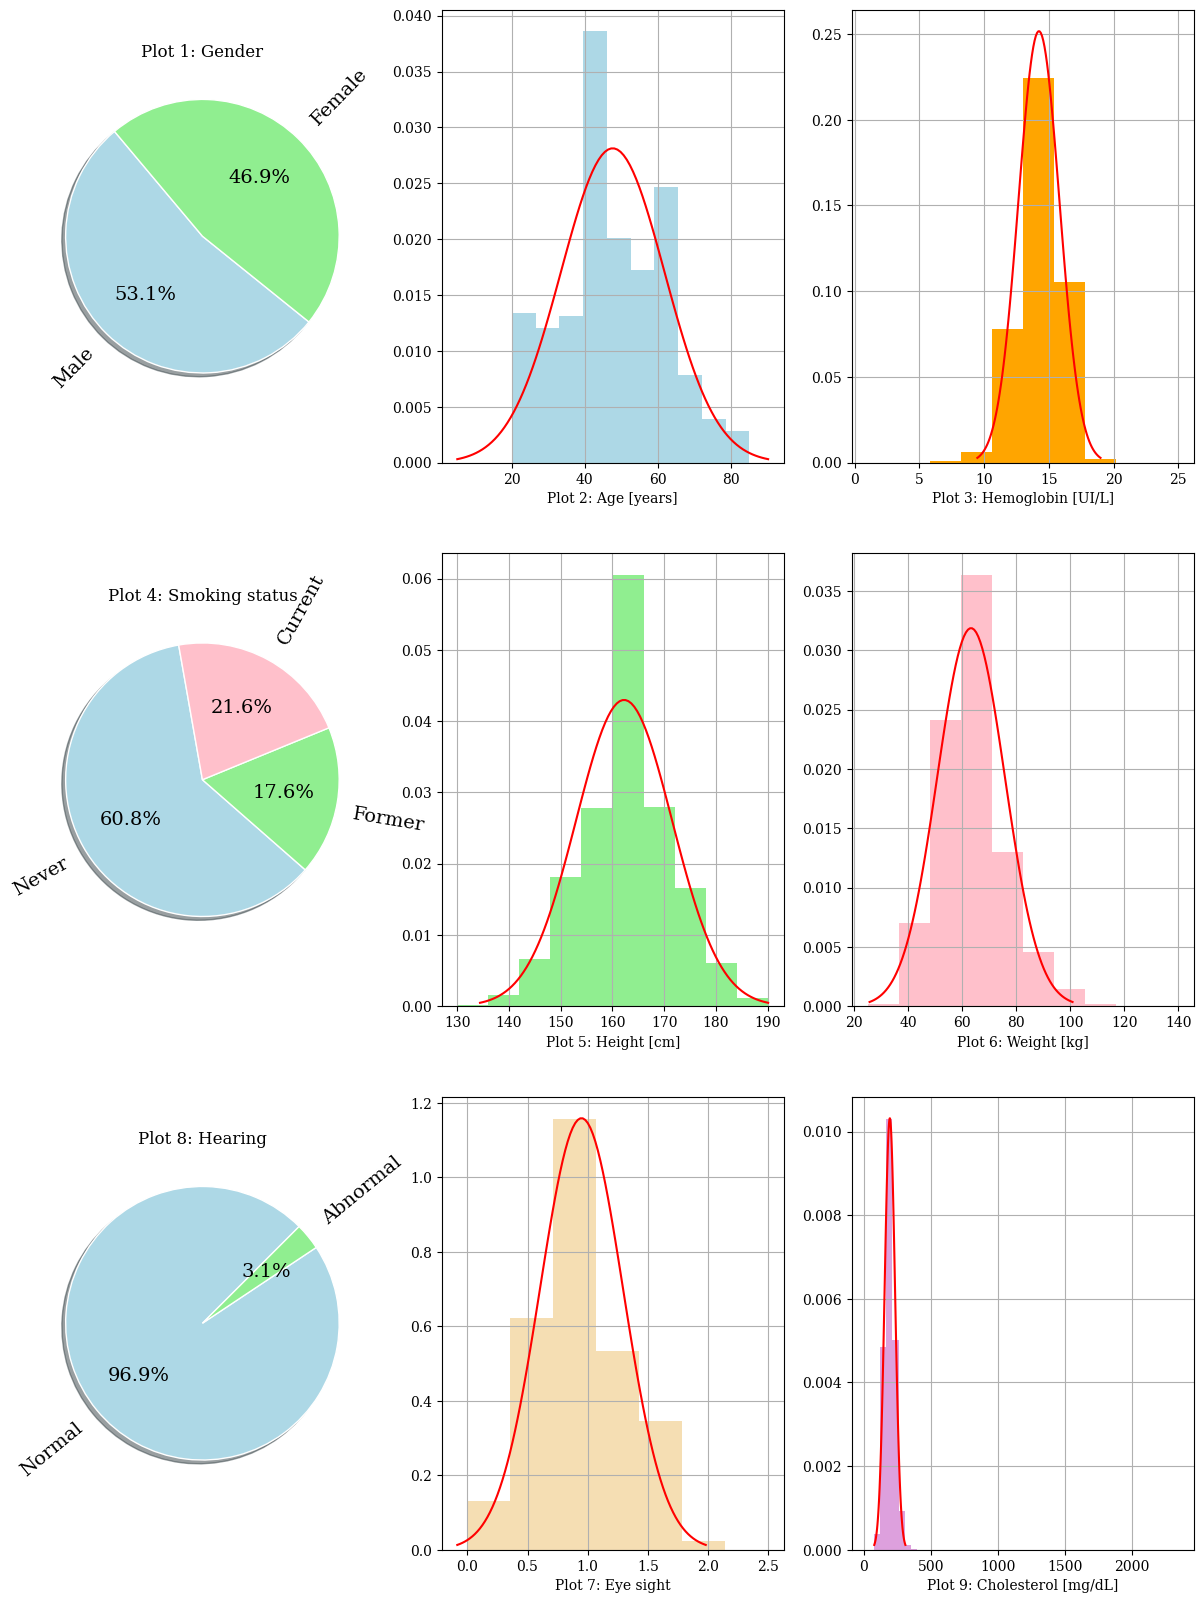

In [38]:
matplotlib.rcParams['font.family'] = 'serif'
# If the data here, fx height is normal dist. then chances are that it is a representative data set.

# plot 2 age
figure(figsize=(15,20))

mu1= np.mean(raw_data[:, 2])
sigma1 = np.std(raw_data[:, 2])

x1 = np.linspace(mu1 - 3*sigma1, mu1 + 3*sigma1, 100)
plt.subplot(3,3,2)
plt.hist(raw_data[:, 2], density=True, color='lightblue', bins = 10)
plt.xlabel('Plot 2: Age [years]')
plt.grid()
plt.plot(x1, stats.norm.pdf(x1, mu1, sigma1), color='red')


# plot 1 sex
ones = np.count_nonzero(raw_data[:, 0]) # 1: male
zeroes = len(raw_data[:, 0]) - ones # female
atts = ['Male', 'Female']
sex = [ones, zeroes]
plt.subplot(3,3,1)
u1 = np.floor(np.sqrt(M)); v1 = np.ceil(float(M)/u1)
plt.plot(1, int(v1), 1)
plt.pie(sex, labels = ['Male', 'Female'], colors = ['lightblue', 'lightgreen'], autopct='%1.1f%%',
startangle=130,
wedgeprops={"linewidth": 1, "edgecolor": "white",'antialiased':True}, textprops={'fontsize': 14}, shadow=True, rotatelabels=True)
plt.title('Plot 1: Gender')


# plot 3: hemoglobin
mu2 = np.mean(raw_data[:,17])
sigma2 = np.std(raw_data[:,17])
x2 = np.linspace(mu2 - 3*sigma2, mu2 + 3*sigma2, 100)
plt.subplot(3,3,3)
plt.hist(raw_data[:, 17], density=True, color='orange', bins = 10)
plt.xlabel('Plot 3: Hemoglobin [UI/L]')
plt.grid()
plt.plot(x2, stats.norm.pdf(x2, mu2, sigma2), color='red')


# plot 4: smoking
a = X[:,-1]
unique, counts = np.unique(a, return_counts=True)
ones = counts[0]
two = counts[1]
three = counts[2]
atts = ['Never', 'Former', 'Current']
sex = [ones, two, three]
plt.subplot(3,3,4)
u1 = np.floor(np.sqrt(M)); v1 = np.ceil(float(M)/u1)
plt.plot(1, int(v1), 1)
plt.pie(sex, labels = atts, colors = ['lightblue', 'lightgreen', 'pink'], autopct='%1.1f%%',
startangle=100,
wedgeprops={"linewidth": 1, "edgecolor": "white",'antialiased':True}, textprops={'fontsize': 14}, shadow=True, rotatelabels=True)
plt.title('Plot 4: Smoking status')


# plot 5: height raw_data[:,3]
mu3 = np.mean(raw_data[:,3])
sigma3 = np.std(raw_data[:,3])
x3 = np.linspace(mu3 - 3*sigma3, mu3 + 3*sigma3, 100)
plt.subplot(3,3,5)
plt.hist(raw_data[:, 3], density=True, color='lightgreen')
plt.xlabel('Plot 5: Height [cm]')
plt.grid()
plt.plot(x3, stats.norm.pdf(x3, mu3, sigma3), color='red')


# plot 6: weight raw_data[:,4]
mu4 = np.mean(raw_data[:,4])
sigma4 = np.std(raw_data[:,4])
x4 = np.linspace(mu4 - 3*sigma4, mu4 + 3*sigma4, 100)
plt.subplot(3,3,6)
plt.hist(raw_data[:, 4], density=True, color='pink', bins=10)
plt.xlabel('Plot 6: Weight [kg]')
plt.grid()
plt.plot(x4, stats.norm.pdf(x4, mu4, sigma4), color='red')

# plot 7, sight raw_data[:,6] left raw_data[:,7] right. Here I have to add two normal distribution. OBS: blind is the outlier
sight_L = raw_data[:, 6]
sight_L[sight_L == 9.9] = 0
sight_R = raw_data[:, 7]
sight_R[sight_R == 9.9] = 0
mu51 = np.mean(sight_L)
sigma51 = np.std(sight_L)
mu52 = np.mean(sight_R)
sigma52 = np.std(sight_R)
mu5 = (mu51 + mu52)/2
sigma5 = (sigma51 + sigma52)/2
x5 = np.linspace(mu5 - 3*sigma5, mu5 + 3*sigma5, 100)
plt.subplot(3,3,8)
plt.hist(sight_L, density=True, color='wheat', bins = 7)
plt.hist(sight_R, density=True, color='wheat', bins = 7)
plt.xlabel('Plot 7: Eye sight')
#plt.scatter(9.2,0.04, color='orange', marker='x')
plt.grid()
plt.plot(x5, stats.norm.pdf(x5, mu5, sigma5), color='red')


# plot 8: hearing raw_data[:,8] left raw_data[:,9] right, very few with abnormaliti
b = raw_data[:, 8]
unique, counts = np.unique(b, return_counts=True)
ones = counts[0]
two = counts[1]
atts = ['Normal', 'Abnormal']
hear = [ones, two]
plt.subplot(3,3,7)
u1 = np.floor(np.sqrt(M)); v1 = np.ceil(float(M)/u1)
plt.plot(1, int(v1), 1)
plt.pie(hear, labels = atts, colors = ['lightblue', 'lightgreen'], autopct='%1.1f%%',
startangle=45,
wedgeprops={"linewidth": 1, "edgecolor": "white",'antialiased':True}, textprops={'fontsize': 14}, shadow=True, rotatelabels=True)
plt.title('Plot 8: Hearing')


# plot 9, chloesterol level total 
chol = raw_data[:,13]
mu6 = np.mean(chol)
sigma6 = np.std(chol)
x6 = np.linspace(mu6 - 3*sigma6, mu6 + 3*sigma6, 100)
plt.subplot(3,3,9)
plt.hist(chol, density=True, color='plum', bins = 50)
plt.xlabel('Plot 9: Cholesterol [mg/dL]')
plt.grid()
plt.plot(x6, stats.norm.pdf(x6, mu6, sigma6), color='red')



plt.show()

#### Log af choleseol 

In [7]:
chol = raw_data[:,13]


np.max(chol), np.min(chol)


(2344.0, 30.0)

In [8]:
chole = []

for i in range(len(chol)):
    chole.append(np.log(chol[i]))

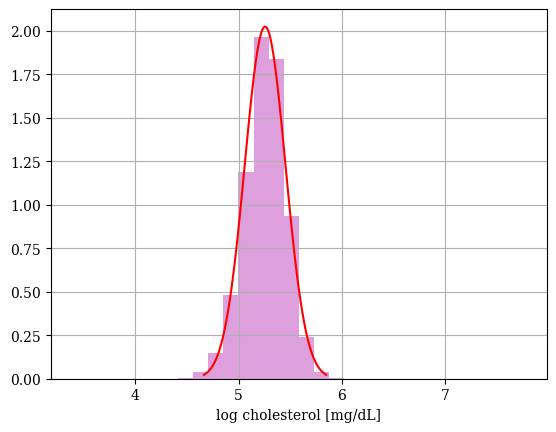

In [9]:
mu6 = np.mean(chole)
sigma6 = np.std(chole)
x6 = np.linspace(mu6 - 3*sigma6, mu6 + 3*sigma6, 100)
plt.hist(chole, density=True, color='plum', bins = 30)
plt.xlabel('log cholesterol [mg/dL]')
plt.plot(x6, stats.norm.pdf(x6, mu6, sigma6), color='red')
plt.grid()
plt.show()

#### Summary statistics

In [10]:
# remove first column in raw_data
raw_data = np.delete(raw_data, 0, 1)

In [12]:
# Create a list for each attribute containing mean, std, 3 quantiles and max and min values
list = []
for i in range(23):
    list.append([attri[i], np.mean(raw_data[:,i]), np.std(raw_data[:,i]), np.quantile(raw_data[:,i], 0.25), np.quantile(raw_data[:,i], 0.5), 
    np.quantile(raw_data[:,i], 0.75), np.max(raw_data[:,i]), np.min(raw_data[:,i])])


KeyboardInterrupt: 

In [ ]:
# Count uniques in waistline, gammagtp and SGIT ALT

# waistline
waist = raw_data[:, 4]

unique, counts = np.unique(waist, return_counts=True)

counts[-1], unique[-1], counts[-2], unique[-2], counts[0], unique[0], counts[1], unique[1]

(57, 999.0, 1, 149.1, 1, 8.0, 1, 27.0)

In [ ]:
# gamma
waist = raw_data[:, 21]

unique, counts = np.unique(waist, return_counts=True)

counts[-1], unique[-1], counts[-2], unique[-2], counts[-3], unique[-3]

(239, 999.0, 1, 998.0, 1, 997.0)

In [ ]:
# SGOT AST
waist = raw_data[:, -4]

unique, counts = np.unique(waist, return_counts=True)

counts[-1], unique[-1], counts[-2], unique[-2], counts[-3], unique[-3]

(1, 9999.0, 2, 7000.0, 1, 3742.0)

#### Correlation between hearing, drinking and smoking

In [13]:
hear = raw_data[:, 8]
smoking = X[:,-1]
drinking = data.values[:,-1]
# replace Y and N with 1 and 0
for i in range(len(drinking)):
    if drinking[i] == 'Y':
        drinking[i] = 1
    else:
        drinking[i] = 0

In [14]:
dr_he = np.corrcoef(hear.astype(float), drinking.astype(float))

smo_he = np.corrcoef(hear.astype(float), smoking.astype(float))

print(dr_he)
print(smo_he)

[[ 1.         -0.05823033]
 [-0.05823033  1.        ]]
[[ 1.        -0.0223303]
 [-0.0223303  1.       ]]


[[ 1.         -0.28458709]
 [-0.28458709  1.        ]]


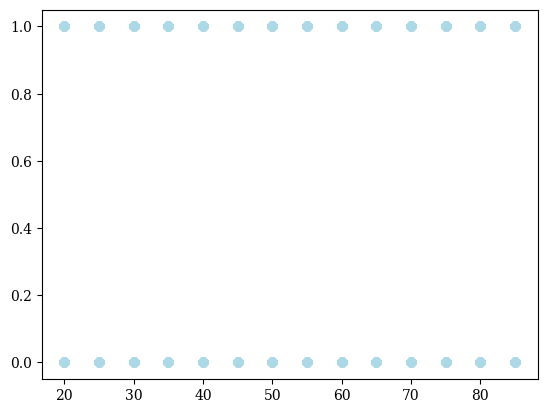

In [15]:
# corr belwteen age and drinking

age = raw_data[:, 1]
dr_age = np.corrcoef(age.astype(float), drinking.astype(float))
print(dr_age)

plt.scatter(age, drinking.astype(float), color='lightblue')

In [25]:
waistline = raw_data[:,4]

waistline[waistline == 999] = np.mean(waistline[waistline != 999]) # replacing the 999 with mean value of waistline
waistline[waistline == np.min(waistline)] = np.mean(waistline[waistline != np.min(waistline)]) # replacing the min value with mean value of waistline

[[1.         0.78810115]
 [0.78810115 1.        ]]


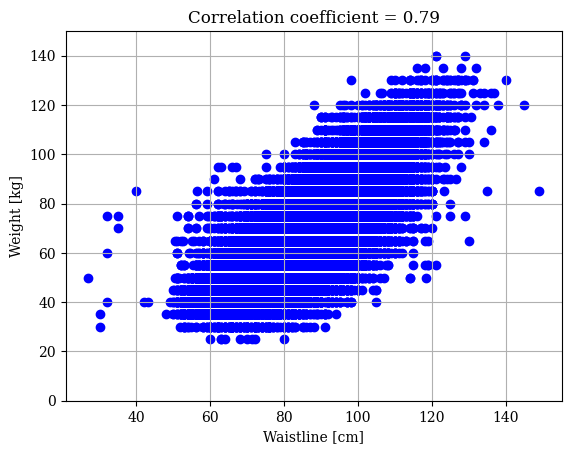

In [32]:
weight = raw_data[:,3]
# correlation:
waist_weight = np.corrcoef(waistline.astype(float), weight.astype(float))
print(waist_weight)

plt.scatter(waistline.astype(float), weight.astype(float), color='blue')
plt.xlabel('Waistline [cm]')
plt.ylabel('Weight [kg]')
plt.grid()
plt.title('Correlation coefficient = 0.79')
ylim(0, 150)
plt.show()


In [17]:
waistline[:5], weight[:5]

(array([90.0, 89.0, 91.0, 91.0, 80.0], dtype=object),
 array([75, 80, 75, 80, 60], dtype=object))

['sex' 'age' 'height' 'weight' 'waistline' 'sight_left' 'sight_right'
 'hear_left' 'hear_right' 'SBP' 'DBP' 'BLDS' 'tot_chole' 'HDL_chole'
 'LDL_chole' 'triglyceride' 'hemoglobin' 'urine_protein'
 'serum_creatinine' 'SGOT_AST' 'SGOT_ALT' 'gamma_GTP' 'SMK_stat_type_cd'
 'DRK_YN']

In [19]:
raw_data[:10]

array([[1, 35, 170, 75, 90.0, 1.0, 1.0, 1.0, 1.0, 120.0, 80.0, 99.0,
        193.0, 48.0, 126.0, 92.0, 17.1, 1.0, 1.0, 21.0, 35.0, 40.0, 1.0],
       [1, 30, 180, 80, 89.0, 0.9, 1.2, 1.0, 1.0, 130.0, 82.0, 106.0,
        228.0, 55.0, 148.0, 121.0, 15.8, 1.0, 0.9, 20.0, 36.0, 27.0, 3.0],
       [1, 40, 165, 75, 91.0, 1.2, 1.5, 1.0, 1.0, 120.0, 70.0, 98.0,
        136.0, 41.0, 74.0, 104.0, 15.8, 1.0, 0.9, 47.0, 32.0, 68.0, 1.0],
       [1, 50, 175, 80, 91.0, 1.5, 1.2, 1.0, 1.0, 145.0, 87.0, 95.0,
        201.0, 76.0, 104.0, 106.0, 17.6, 1.0, 1.1, 29.0, 34.0, 18.0, 1.0],
       [1, 50, 165, 60, 80.0, 1.0, 1.2, 1.0, 1.0, 138.0, 82.0, 101.0,
        199.0, 61.0, 117.0, 104.0, 13.8, 1.0, 0.8, 19.0, 12.0, 25.0, 1.0],
       [1, 50, 165, 55, 75.0, 1.2, 1.5, 1.0, 1.0, 142.0, 92.0, 99.0,
        218.0, 77.0, 95.0, 232.0, 13.8, 3.0, 0.8, 29.0, 40.0, 37.0, 3.0],
       [0, 45, 150, 55, 69.0, 0.5, 0.4, 1.0, 1.0, 101.0, 58.0, 89.0,
        196.0, 66.0, 115.0, 75.0, 12.3, 1.0, 0.8, 19.0, 12.0, 12.0, 